In [98]:
import os
import glob
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [99]:
# helpers

def printLoadingScores(pca, index, component):
    # prints loading scores for a given principal component 
    loadingScores = pd.Series(pca.components_[component], index=index).sort_values(ascending=False, key=abs)
    print(loadingScores[loadingScores[0:19].index.values])
    

In [100]:
# Read and merge all cleaned data into a single data frame

df = pd.read_csv('./Data/Cleaned/AllData.csv')

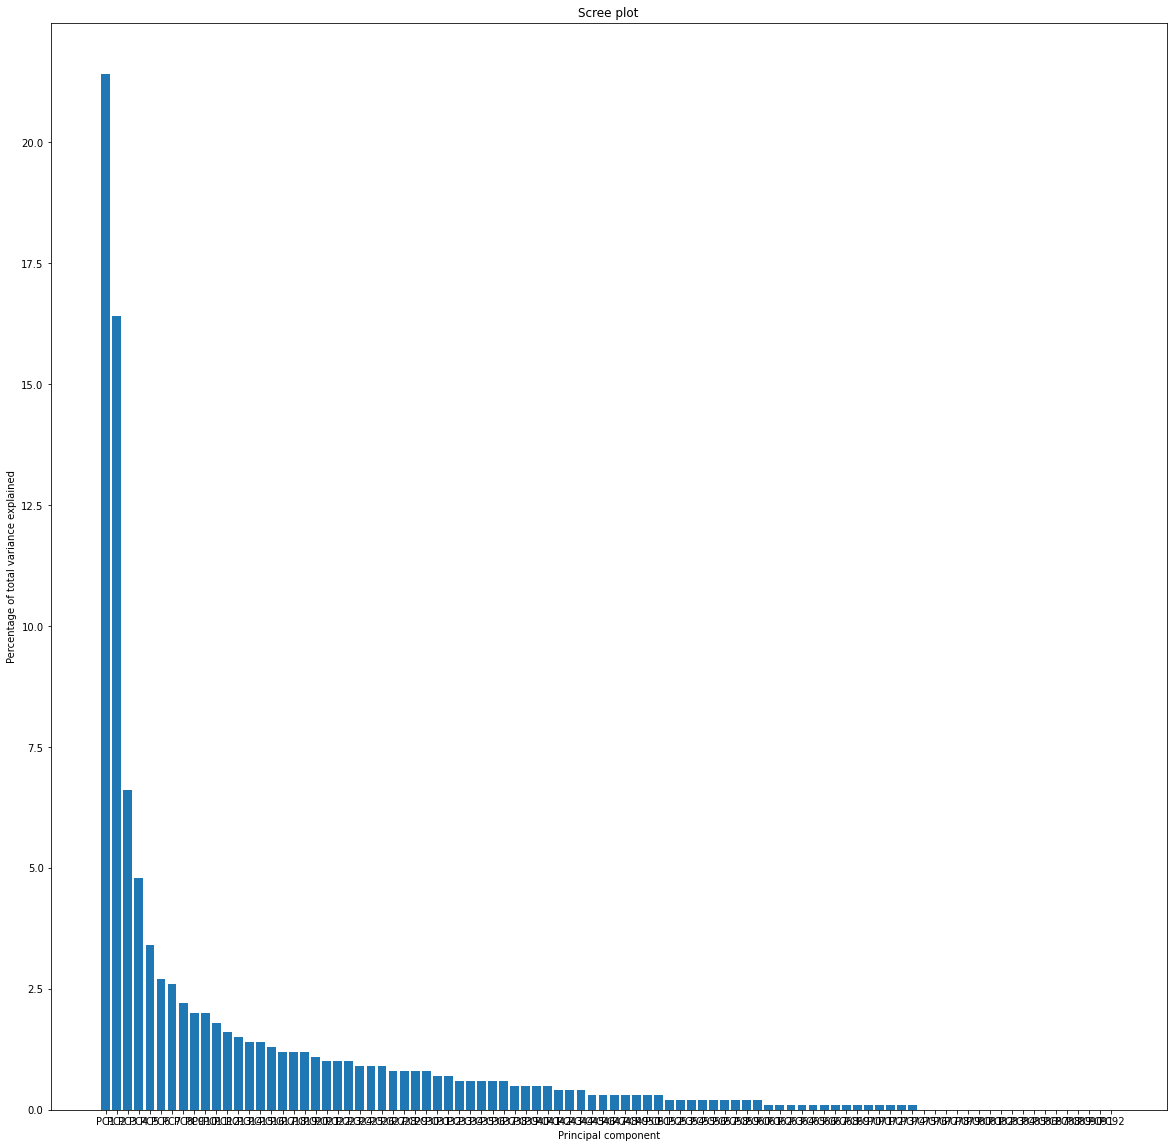

In [101]:
# drop non-numeric and unwanted coloumns
tempDf = df.drop(["Unnamed: 0", "Player", "Team"], axis=1)

# shift data mean to origin and scale variance in each feature to 1
scaledDf = preprocessing.scale(tempDf)

# perform pca
pca = PCA()
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

# find percentage of variance accounted for by principal componenets
varPercent = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# create scree plot
labels = ['PC' + str(i) for i in range(1, len(varPercent) + 1)]

plt.figure(figsize = (20,20))
plt.bar(x=labels, height=varPercent)
plt.ylabel('Percentage of total variance explained')
plt.xlabel('Principal component')
plt.title("Scree plot")
plt.show()


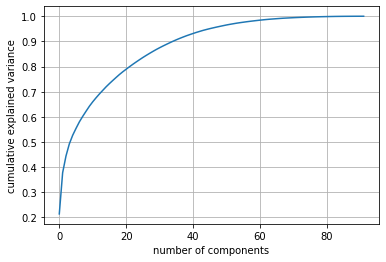

In [102]:
# get cumulative explained variance plot by number of principal components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [103]:
print(sum(varPercent[:8]))

60.1


In [104]:
# We use 5 principal components to balance variance explaining power and interpretability of our components
# re-run pca keeping only top 5 components
pca = PCA(5)
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

In [105]:
# re-insert players and teams to make a new data frame

pcaDf = pd.DataFrame(pcaData, columns=labels[0:5])
pcaDf = pcaDf[labels[0:5]]
pcaDf["Player"] = df["Player"]
pcaDf["Team"] = df["Team"]

pcaDf.head()

,PC1,PC2,PC3,PC4,PC5,Player,Team
0,-7.974679,6.554705,-3.463541,-2.397999,-1.533190,Stephen Curry,GSW
1,-4.268076,7.338894,-2.371827,-4.320457,-1.777732,Bradley Beal,WAS
2,-9.076074,7.843846,-0.796583,-4.409138,0.945223,Damian Lillard,POR
3,6.455920,15.388592,-4.307791,1.964728,6.277343,Joel Embiid,PHI
4,0.255078,11.379236,2.006127,-1.509231,0.542961,Giannis Antetokounmpo,MIL


In [106]:
# PC1

printLoadingScores(pca, tempDf.columns, 0)
pcaDf.nlargest(10, "PC1")

OREB%               0.187915
AvgDribPerTouch    -0.184749
PaintTouches        0.174250
PaintTouch FGM      0.171507
ContestedDREB%      0.170546
ASTToPass%         -0.169792
DrivePASS          -0.169531
%BLK                0.168943
DriveAST           -0.168225
PaintTouch FTM      0.162565
AVG DREBDistance   -0.159855
AVG OREBDistance   -0.157042
3FGM%UAST          -0.154248
%DREB               0.151361
DREB%               0.149362
AST%               -0.149120
Pull UpFGM         -0.148857
ContestedOREB%      0.147931
SecondaryAST       -0.146316
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
94,11.180231,6.630924,2.062504,0.832865,-2.292404,Rudy Gobert,UTA
82,11.130417,5.528749,3.156442,0.683646,-1.895824,Clint Capela,ATL
232,9.892971,2.194436,1.240179,-3.371451,1.972042,Hassan Whiteside,SAC
219,9.852189,2.399722,1.437163,-5.635765,-1.112775,Moses Brown,BOS
274,9.839110,0.707796,2.227008,-3.025799,-1.458578,Daniel Gafford,WAS
122,9.299745,4.930598,0.639661,0.331363,-0.246302,Jarrett Allen,CLE
86,9.271753,7.490817,4.319563,0.825093,0.532917,Andre Drummond,LAL
369,9.171850,-1.100715,3.116921,-5.115545,0.225456,Onyeka Okongwu,ATL
91,9.076376,6.308204,-0.184582,1.984635,1.092667,Deandre Ayton,PHX
258,9.005325,1.741766,4.159654,-1.976140,-0.012733,DeAndre Jordan,BKN


PC1 seems to reward players who:
- Grab a lot of rebounds,
- Stay in the paint area a lot

PC1 seems to penalize players who:
- Dribble a lot whenever they touch the ball
- Drive to the basket
- Get their rebound further from the basket
- Gets Assist

High PC1 values indicate that the player predominately plays close to the basket. It’s safe to assume Centers would have high PC1 values.

In [107]:
# PC2

printLoadingScores(pca, tempDf.columns, 1)
pcaDf.nlargest(10, "PC2")

PIE                     0.221985
FTM                     0.217705
Front CTTouches         0.210167
USG%                    0.190486
PassesMade              0.187982
OPPPTSPAINT             0.181840
OPPPTSOFFTOV            0.175140
PostTouchFGM            0.161922
DriveFTM                0.158226
PostTouchTO             0.157167
AvgSpeedDef            -0.156629
PostTouchFTM            0.154974
POSS                    0.153537
DriveFGM                0.152202
PostTouchAST            0.152191
DeferredDREB Chances    0.150090
SecondaryAST            0.147505
DFGA                    0.145061
Pull UpFGM              0.144143
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
3,6.455920,15.388592,-4.307791,1.964728,6.277343,Joel Embiid,PHI
12,2.886093,13.870677,-0.182280,6.254708,3.701872,Nikola Jokic,DEN
4,0.255078,11.379236,2.006127,-1.509231,0.542961,Giannis Antetokounmpo,MIL
5,-6.877018,11.276199,2.490314,-4.089043,1.184508,Luka Doncic,DAL
18,4.460412,10.804334,-3.565389,2.393350,2.210659,Karl-Anthony Towns,MIN
40,4.469683,10.591454,0.787028,5.261548,-0.183868,Domantas Sabonis,IND
29,-6.562886,10.397023,5.641051,1.219204,0.052222,Russell Westbrook,WAS
22,-2.038970,10.241227,-1.293807,3.005324,0.892157,Julius Randle,NYK
20,-8.778553,10.157013,4.308687,-1.196778,0.617984,James Harden,BKN
16,-3.846327,9.183402,0.510166,0.829596,2.407157,LeBron James,LAL


PC2 seems to highly rate players who:
- Have a high Player Impact Efficiency 
- Make a lot of free throws
- Make a lot of touches in the attacking half
- Make lots of passes
- Carry out offence in all forms (Drive,Post, Pull Up)
- Allow opponents to score points on them 

PC2 seems to penalise players who:
- Do not run fast for defence

High PC2 values indicate that the players are offensive minded.


In [108]:
# PC3

printLoadingScores(pca, tempDf.columns, 2)
pcaDf.nlargest(10, "PC3")

C&SFGM             -0.304301
PTSPerTouch        -0.263558
AST Ratio           0.241419
3PM                -0.229927
3P%                -0.224560
C&S3P%             -0.200923
%FGA2PT             0.199298
TO Ratio            0.194468
FGM%UAST            0.189407
FGM%AST            -0.189390
3FGM%AST           -0.183961
AST%                0.172057
C&SFG%             -0.167727
PaintTouch PASS%    0.159928
PaintTouch PTS%    -0.159387
STL%                0.155412
FT%                -0.144337
AvgDribPerTouch     0.138899
PaintTouch AST%     0.127176
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
396,5.516065,-1.979939,7.481866,-0.152485,1.035684,Ed Davis,MIN
218,-6.268747,0.245241,6.846062,2.914965,-1.647366,T.J. McConnell,IND
393,-3.986598,-4.314066,5.961083,2.028128,4.631099,Matthew Dellavedova,CLE
29,-6.562886,10.397023,5.641051,1.219204,0.052222,Russell Westbrook,WAS
171,6.619537,4.960273,5.460889,2.544457,-0.950127,Mason Plumlee,DET
333,-5.109113,-1.681813,5.200112,2.279530,3.474741,Rajon Rondo,LAC
353,7.072730,-1.399398,5.172356,0.348537,-2.040325,Bismack Biyombo,CHA
227,8.326975,0.213310,5.070006,1.672820,-3.440186,Mitchell Robinson,NYK
286,-5.762872,-1.569213,4.991416,1.214465,-0.963895,Killian Hayes,DET
253,6.976485,2.084385,4.912644,0.490503,-1.129823,Steven Adams,NOP


C3 seems to highly rate players who:
- Do a lot of assist
- Score a larger portion of their points on 2 pointers
- Make their field goals unassisted
- Take more dribbles per touch
- Have higher percentage of opponent possessions that end with a steal by the player while he was on the floor.  

PC3 seems to penalise players who:
- Make more Catch and Shoot Field Goals
- Make 3 pointers
- Make free throws

High PC3 values indicate that the players are assist makers that cannot shoot the ball well

In [109]:
# PC4

printLoadingScores(pca, tempDf.columns, 3)
pcaDf.nlargest(10, "PC4")

DEFWS                0.204034
PTSPerTouch         -0.196930
DrivePASS%           0.188573
NETRTG               0.186120
%PTSFT              -0.180938
AGE                  0.178860
AST Ratio            0.177506
PostTouchAST         0.166759
DrivePTS%           -0.163910
DEF RTG             -0.162639
DriveFTM            -0.160487
PaintTouch PASS%     0.154573
FGM%AST              0.153183
FGM%UAST            -0.153172
C&SFGM               0.153026
DriveFGM            -0.150196
USG%                -0.148285
PaintTouch AST       0.147733
PTSPerElbow Touch   -0.144723
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
272,-0.853320,4.142786,4.785736,7.072370,-2.074765,Draymond Green,GSW
276,-1.248512,-1.336059,-0.019334,6.382394,-3.049765,Royce O'Neale,UTA
12,2.886093,13.870677,-0.182280,6.254708,3.701872,Nikola Jokic,DEN
25,2.449850,8.840446,-4.384541,5.918108,4.156106,Nikola Vucevic,CHI
351,2.704112,-1.018501,1.219104,5.756689,1.967658,Marc Gasol,LAL
375,-1.171754,-3.696945,2.564050,5.506820,0.525875,Andre Iguodala,MIA
195,1.940180,1.604445,1.411115,5.362411,-1.233152,Larry Nance Jr.,CLE
40,4.469683,10.591454,0.787028,5.261548,-0.183868,Domantas Sabonis,IND
234,0.117799,-1.914256,-1.139488,5.016139,0.205809,Nicolas Batum,LAC
222,0.721228,-0.323317,-1.643581,4.523697,-2.394608,Robert Covington,POR


PC4 seems to highly rate players who: 
- Have a high net rating during games
- End a drive with higher percentage of pass
- Assist at a higher rate than they shoot
- Stay in the paint

PC4 seems to penalise players who:
- Score more of their points from free throws, drives
- Make their field goals unassisted
- Use the ball a lot 

High PC4 values indicate that the players has a positive net rating on the team and pass the ball more than they shoot. They also stay in the paint. Seems to be centers/forwards that can pass the ball well. 


In [110]:
# PC5

printLoadingScores(pca, tempDf.columns, 4)
pcaDf.nlargest(10, "PC5")

OPPPTSOFFTOV           -0.230980
%PTSOffTO              -0.220981
STL                    -0.216469
%PTS2PT MR              0.211387
PostTouchFGM            0.209798
PF                     -0.209677
%PTSFBPs               -0.209069
OPPPTSPAINT            -0.198309
AvgSpeedOff            -0.197956
POSS                   -0.196525
PostTouchFTM            0.193564
AGE                     0.188840
AvgSpeedDef            -0.186058
AdjustedDREB Chance%    0.175818
PostTouchTO             0.167994
PostTouchPASS%         -0.154395
PostTouchAST            0.144548
PTSPerElbow Touch      -0.144463
AST/TO                  0.133679
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
3,6.455920,15.388592,-4.307791,1.964728,6.277343,Joel Embiid,PHI
385,-2.932169,-5.723055,4.085922,-1.614723,5.563355,Jordan Bone,ORL
321,-7.735089,-4.548226,4.014740,1.657326,5.239683,Yogi Ferrell,LAC
112,-0.218347,1.776264,-3.971108,-1.837034,5.104208,Carmelo Anthony,POR
393,-3.986598,-4.314066,5.961083,2.028128,4.631099,Matthew Dellavedova,CLE
106,3.341794,2.854303,-4.463479,1.843452,4.568141,LaMarcus Aldridge,BKN
287,-4.263017,-1.177996,2.708474,-1.716011,4.279797,Jeff Teague,MIL
25,2.449850,8.840446,-4.384541,5.918108,4.156106,Nikola Vucevic,CHI
247,-6.272552,-0.898751,4.407453,-1.070303,4.101830,Mike James,BKN
12,2.886093,13.870677,-0.182280,6.254708,3.701872,Nikola Jokic,DEN


PC5 seems to highly rate players who:
- Make a lot of their plays in the post
- Have high chance of defensive rebound
- Have high ratio of assist to turnovers

PC5 seems to penalise players who:
- Fouls a lot
- Steal a lot
- Possess the ball a lot
- Make their points from turnovers
- Let opponents score in the paint
- Not efficient with their touches in the paint

High PC% values indicate that the player is a predominantly a paint/post player that do not run very fast during the game. As a paint/post player, they would also snatch more defensive rebounds and make fewer turnovers to assist. 

In [111]:
pcaDf.to_csv('./Data/PCAData.csv', index = False)

In [112]:
""" Can consider using this cell if we get nice clusters based on just a few variables.

# Principal component plot

pcaDf = pd.DataFrame(pcaData, columns=labels)

# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)
# plt.show()

# Fixing random state for reproducibility

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

xs = pcaDf.PC1
ys = pcaDf.PC2
zs = pcaDf.PC3
ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
"""

" Can consider using this cell if we get nice clusters based on just a few variables.\n\n# Principal component plot\n\npcaDf = pd.DataFrame(pcaData, columns=labels)\n\n# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)\n# plt.show()\n\n# Fixing random state for reproducibility\n\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\n\nn = 100\n\n# For each set of style and range settings, plot n random points in the box\n# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].\n\nxs = pcaDf.PC1\nys = pcaDf.PC2\nzs = pcaDf.PC3\nax.scatter(xs, ys, zs, marker='o')\n\nax.set_xlabel('X Label')\nax.set_ylabel('Y Label')\nax.set_zlabel('Z Label')\n\nplt.show()\n"